**Cleans CSV!** 

We will use the test/train/val datasets to train one model, and next we will split sentimentdataset into test/train/val to train a different model, then compare model performances.

In [8]:
import pandas as pd

#add addicted label to training data
train_data = pd.read_csv("train.csv")

train_data.dropna(inplace=True)

train_data["Addicted"] = (train_data["Daily_Usage_Time (minutes)"] > 120).astype(int)

count_more_than_120 = train_data["Addicted"].sum()
count_less_than_120 = (train_data["Addicted"] == 0).sum()

#add addicted label to testing data
test_data = pd.read_csv("test.csv")

test_data.dropna(inplace=True)

test_data["Addicted"] = (test_data["Daily_Usage_Time (minutes)"] > 120).astype(int)

count_more_than_120 = test_data["Addicted"].sum()
count_less_than_120 = (test_data["Addicted"] == 0).sum()

print(train_data[["Daily_Usage_Time (minutes)", "Age", "Gender", "Addicted"]].head())
print(f"Number of people with Daily Usage Time greater than 120 minutes: {count_more_than_120}")
print(f"Number of people with Daily Usage Time less than or equal to 120 minutes: {count_less_than_120}")


   Daily_Usage_Time (minutes) Age      Gender  Addicted
0                       120.0  25      Female         0
1                        90.0  30        Male         0
2                        60.0  22  Non-binary         0
3                       200.0  28      Female         1
4                        45.0  33        Male         0
Number of people with Daily Usage Time greater than 120 minutes: 14
Number of people with Daily Usage Time less than or equal to 120 minutes: 89


object
       Daily_Usage_Time (minutes)  Posts_Per_Day  Likes_Received_Per_Day  \
count                 1000.000000    1000.000000             1000.000000   
mean                    95.950000       3.321000               39.898000   
std                     38.850442       1.914582               26.393867   
min                     40.000000       1.000000                5.000000   
25%                     65.000000       2.000000               20.000000   
50%                     85.000000       3.000000               33.000000   
75%                    120.000000       4.000000               55.000000   
max                    200.000000       8.000000              110.000000   

       Comments_Received_Per_Day  Messages_Sent_Per_Day     Addicted  
count                1000.000000            1000.000000  1000.000000  
mean                   15.611000              22.560000     0.220000  
std                     8.819493               8.516274     0.414454  
min                     

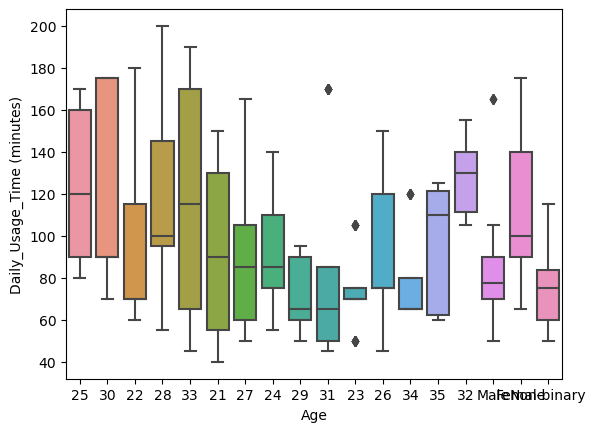

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

print(train_data['Age'].dtype)
# print(len(df.loc[df["Gender"]=="Male"]))
# print(len(df.loc[df["Age"]=="Male"]))
print(train_data.describe())

ax = sns.boxplot(x=train_data["Age"], y=train_data["Daily_Usage_Time (minutes)"])
#ax.axvline(25, color=".3", dashes=(2, 2))


In [11]:
import pandas as pd

#Clean Train Data
train_data = pd.read_csv('train.csv')
known_genders = ["Male", "Female", "Non-binary"]
swapped_rows = train_data['Age'].astype(str).isin(known_genders)

#swap Age and Gender where needed
train_data.loc[swapped_rows, ['Age', 'Gender']] = train_data.loc[swapped_rows, ['Gender', 'Age']].values

#Age --> numeric and  invalid values --> NaN
train_data['Age'] = pd.to_numeric(train_data['Age'], errors='coerce')

#Encode emotion
train_data["emotion_num"] = pd.factorize(train_data["Dominant_Emotion"])[0]
train_data["Addicted"] = (train_data["Daily_Usage_Time (minutes)"] > 120).astype(int)

#Drop NaN value
train_data = train_data.dropna(subset=['Dominant_Emotion'])

#new cleaned file
train_data.to_csv('train_cleaned.csv', index=False)
print(train_data[swapped_rows])

#Clean Test Data
test_data = pd.read_csv('test.csv')
known_genders = ["Male", "Female", "Non-binary"]
swapped_rows = test_data['Age'].astype(str).isin(known_genders)

#swap Age and Gender where needed
test_data.loc[swapped_rows, ['Age', 'Gender']] = test_data.loc[swapped_rows, ['Gender', 'Age']].values

#Age --> numeric and  invalid values --> NaN
test_data['Age'] = pd.to_numeric(test_data['Age'], errors='coerce')

#Encode emotion
test_data["emotion_num"] = pd.factorize(test_data["Dominant_Emotion"])[0]
test_data["Addicted"] = (test_data["Daily_Usage_Time (minutes)"] > 120).astype(int)

#new cleaned file
train_data.to_csv('test_cleaned.csv', index=False)

    User_ID   Age      Gender   Platform  Daily_Usage_Time (minutes)  \
250     251  27.0        Male  Instagram                       165.0   
251     252  24.0      Female    Twitter                        75.0   
252     253  29.0  Non-binary   Facebook                        85.0   
253     254  33.0      Female  Instagram                       145.0   
254     255  31.0        Male   LinkedIn                        60.0   
..      ...   ...         ...        ...                         ...   
784     784  22.0        Male    Twitter                        70.0   
785     785  29.0  Non-binary   Facebook                        75.0   
786     786  28.0      Female   Whatsapp                       100.0   
787     787  31.0        Male   Telegram                        85.0   
788     788  21.0  Non-binary   Snapchat                        60.0   

     Posts_Per_Day  Likes_Received_Per_Day  Comments_Received_Per_Day  \
250            6.0                    85.0                    

C:\Users\gresn\AppData\Local\Temp\ipykernel_63480\1135104794.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(train_data[swapped_rows])


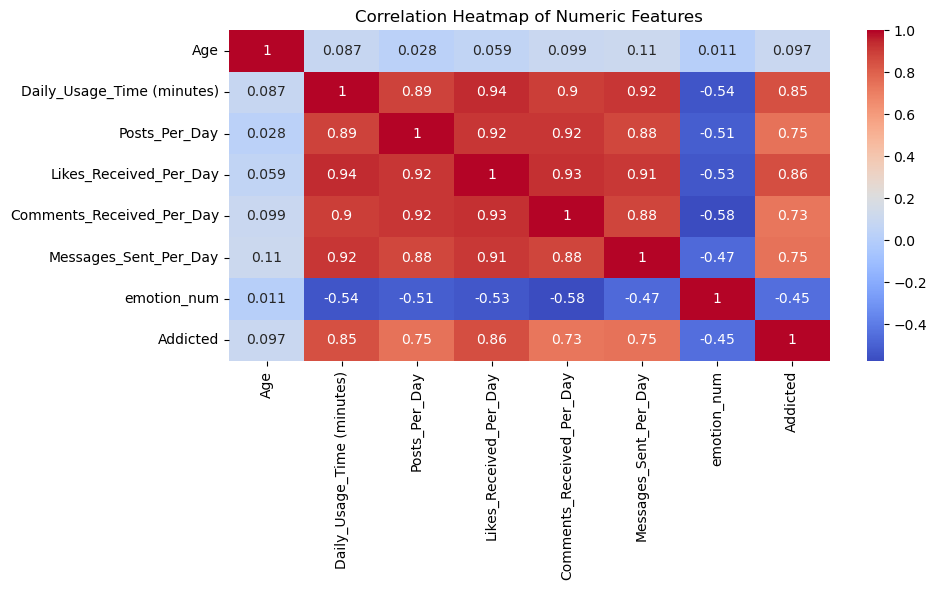

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Select only numeric columns
numeric_df = train_data.select_dtypes(include='number')

# Step 2: Compute correlation matrix
corr_matrix = numeric_df.corr()

# Step 3: Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()

In [13]:
print(train_data.columns)
print(train_data['Dominant_Emotion'].isna().sum())

Index(['User_ID', 'Age', 'Gender', 'Platform', 'Daily_Usage_Time (minutes)',
       'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion', 'emotion_num', 'Addicted'],
      dtype='object')
0


In [14]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import time

scaler = StandardScaler()

X_train = train_data[["Posts_Per_Day", "Likes_Received_Per_Day", "emotion_num"]]
Y_train = train_data["Addicted"]

X_test = test_data[["Posts_Per_Day", "Likes_Received_Per_Day", "emotion_num"]]
Y_test = test_data["Addicted"]

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
X_train, X_test, y_train, y_test = X_train_scaled, X_test_scaled, Y_train, Y_test

#Try a few different classification models to classify addicted/not addicted

#K-Nearest Neighbors
start_time1 = time.process_time()
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
end_time1 = time.process_time()

time = end_time1 - start_time1
print("Time:", time)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

#Random Forest
forest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_forest))
print(classification_report(y_test, y_pred_forest))

#Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

C:\Users\gresn\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Time: 0.0
KNN Accuracy: 0.970873786407767
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        89
           1       0.82      1.00      0.90        14

    accuracy                           0.97       103
   macro avg       0.91      0.98      0.94       103
weighted avg       0.98      0.97      0.97       103

Random Forest Accuracy: 0.9902912621359223
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        89
           1       0.93      1.00      0.97        14

    accuracy                           0.99       103
   macro avg       0.97      0.99      0.98       103
weighted avg       0.99      0.99      0.99       103

Logistic Regression Accuracy: 0.9611650485436893
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        89
           1       0.78      1.00      0.88        14

    accuracy                           0.96     

In [55]:
import pandas as pd

df = pd.read_csv("sentimentdataset.csv")

df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df["Date"] = df["Timestamp"].dt.date
user_daily_activity = df.groupby(["User", "Date"]).agg(
    total_posts=("Text", "count"),  
    total_likes=("Likes", "sum"),
    total_retweets=("Retweets", "sum"),
    first_post=("Timestamp", "min"),  
    last_post=("Timestamp", "max")
).reset_index()

user_daily_activity["Active_Hours"] = (user_daily_activity["last_post"] - user_daily_activity["first_post"]).dt.total_seconds() / 3600
user_daily_activity["Active_Hours"].fillna(0, inplace=True)
user_daily_activity["Daily_Usage_Time"] = user_daily_activity["total_posts"] * 15 / 60
user_daily_activity["Total_Interactions"] = user_daily_activity["total_likes"] + user_daily_activity["total_retweets"]

#'addicted' label if more than 2 hours OR 100 interactions
user_daily_activity["Addicted"] = ((user_daily_activity["Daily_Usage_Time"] > 2) | 
                                   (user_daily_activity["Total_Interactions"] > 100)).astype(int)

#merge
df = df.merge(user_daily_activity[["User", "Date", "Addicted"]], on=["User", "Date"], how="left")
df.dropna(inplace=True)

#Encode sentiment
df["sentiment_num"] = pd.factorize(df["Sentiment"])[0]

print(df[["User", "Date", "Addicted"]].head())

print("Number of addicted users:", df["Addicted"].sum())
total_users = df["User"].nunique()
print("Total number of users:", total_users)

             User        Date  Addicted
0   User123        2023-01-15         0
1   CommuterX      2023-01-15         0
2   FitnessFan     2023-01-15         0
3   AdventureX     2023-01-15         0
4   ChefCook       2023-01-15         0
Number of addicted users: 105
Total number of users: 685


In [16]:
#imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


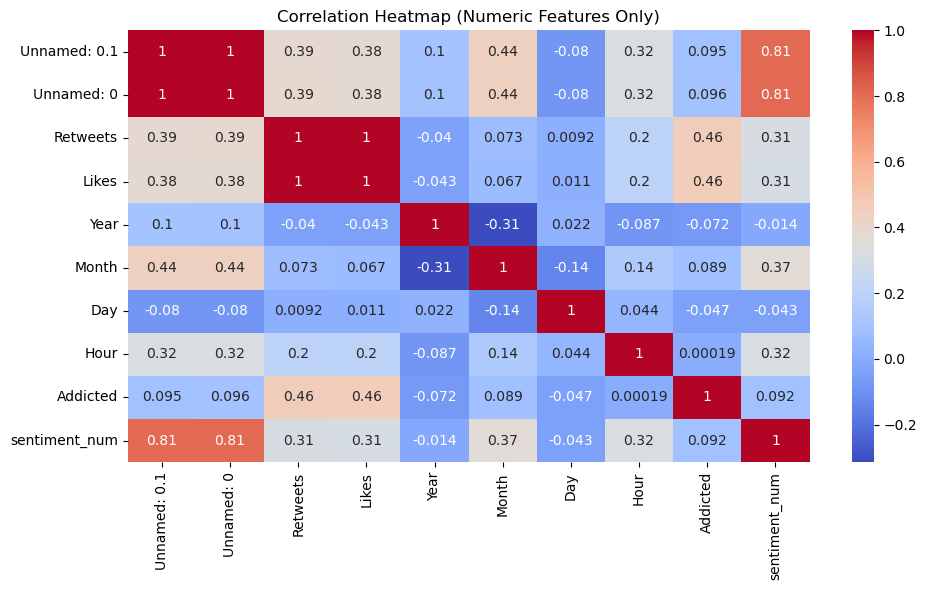

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Only select numeric columns for correlation
numeric_df = df.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.tight_layout()
plt.show()

In [26]:
print(df.columns)

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour', 'Date', 'Addicted', 'sentiment_num'],
      dtype='object')


In [27]:
#Models for Sentiment Dataset

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

#Define variables for training and testing
#Features based only on user behavior
scaler = StandardScaler()

X = df[["sentiment_num", "Retweets", "Likes"]]
X_scaled = scaler.fit_transform(X)
y = df["Addicted"]
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.33, random_state = 42)

#Try a few different classification models to classify addicted/not addicted

#K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

#Random Forest
forest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_forest))
print(classification_report(y_test, y_pred_forest))

#Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

C:\Users\gresn\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.9504132231404959
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       208
           1       0.87      0.76      0.81        34

    accuracy                           0.95       242
   macro avg       0.91      0.87      0.89       242
weighted avg       0.95      0.95      0.95       242

Accuracy: 0.9462809917355371
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       208
           1       1.00      0.62      0.76        34

    accuracy                           0.95       242
   macro avg       0.97      0.81      0.87       242
weighted avg       0.95      0.95      0.94       242

Logistic Regression Accuracy: 0.9421487603305785
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       208
           1       1.00      0.59      0.74        34

    accuracy                           0.94       242
   macro avg       0.